# import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble, linear_model, metrics, model_selection, naive_bayes, svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [3]:
df = pd.read_csv('data/herodotus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pos     1555 non-null   object
 1   label   1555 non-null   object
dtypes: object(2)
memory usage: 24.4+ KB


In [4]:
df.head()

,pos,label
0,n-s---mg- n-s---mg- n-s---fg- n-s---fn- p-s---...,h
1,n-p---mg- d-------- d-------- l-p---mn- a-p---...,h
2,p-p---ma- d-------- r-------- l-s---fg- a-s---...,h
3,l-s---nn- d-------- n-s---nn- a-s---ma- l-s---...,h
4,v-papmma- d-------- l-p---ma- n-p---ma- r-----...,h


In [5]:
print(df.label.value_counts())

df_ordered = df.copy(deep=True)
df = shuffle(df, random_state=750)

pos = df.pos.tolist()
labels = df.label.tolist()
pos_ordered = df_ordered.pos.tolist()

y = labels
for i, _ in enumerate(y):
    if random.randint(0, 1) == 1:
        y[i] = 'MOCK_CLASS'
        
df.head()

h    1555
Name: label, dtype: int64


,pos,label
652,a-s---na- d-------- v3paia--- p-p---fn- u-----...,h
410,v-sapamn- l-p---ma- n-p---ma- r-------- n-p---...,h
797,n-s---mn- d-------- c-------- v3saia--- p1s---...,h
474,r-------- d-------- d-------- l-s---ma- n-s---...,h
183,d-------- d-------- v--anm--- p1s---ma- n-s---...,h


In [6]:
vectorizer = TfidfVectorizer(ngram_range=(0, 9), analyzer='char')
posv = vectorizer.fit_transform(pos)
posv = posv.toarray()
x = posv

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(0, 9), analyzer='char')
posv = vectorizer.fit_transform(pos_ordered)
posv = posv.toarray()
x_ordered = posv

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=750)

In [9]:
model = ensemble.RandomForestClassifier(n_estimators=500,random_state=750,  n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.511


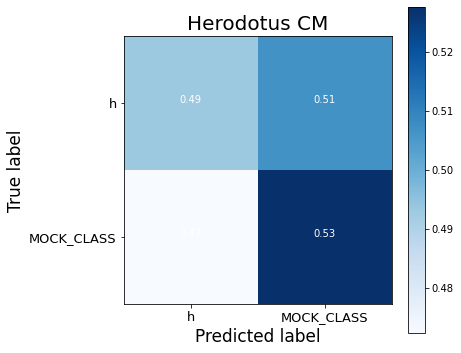

In [10]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['h', 'MOCK_CLASS'], title="Herodotus CM")
plt.show()

In [11]:
preds = model.predict(x_ordered)

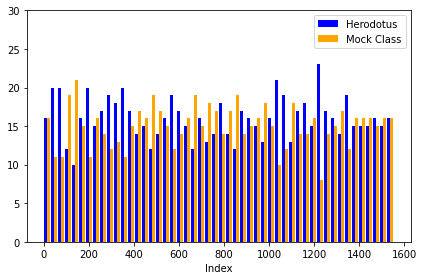

In [12]:
herodotus = []
mock_class = []
for i, author in enumerate(preds):
    if author == 'h':
        herodotus.append(i)
    else:
        mock_class.append(i)

plt.hist(
    [herodotus, mock_class], 
    bins=50,
    color=['Blue', 'Orange'], 
    label=['Herodotus', 'Mock Class'],
)
plt.ylim(0, 30)
plt.xlabel('Index')
plt.legend()
plt.tight_layout()
plt.show()